# Praktikum

In [1]:
#English Languange
#Di sini digunakan untuk import library. Library yang digunakan pandas, numpy, matplotlib dan wordcloud
import pandas as pd
import numpy as np
import matplotlib as plt


In [2]:
#Import data
#mengambil data dan di simpan pada variable df 
url = "https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/sentimentdata.csv"
df = pd.read_csv(url)
#df = pd.read_csv("sentimentdata.csv")
df.shape

(20, 2)

In [3]:
df

,document,label
0,Pizza is great and I love pizza.,Positive
1,I hate burger and its bad to eat burger.,Negative
2,I hate dirty tables.,Negative
3,Burger is amazing and I love it more than anyt...,Positive
4,My boss is a monster and I hate him,Negative
5,The food was delivered late and I hate late de...,Negative
6,My wife love pizza and burger more than me,Positive
7,the table was bad and dirty and i hate this,Negative
8,Food was delicious and I love it,Positive
9,It great to have good food at good time,Positive


In [4]:
#Membagi data x adalah document dan y adalah labelnya
x = df.document
y = df.label


# Filtering

In [5]:
# import library re (reguler expression)
import re
import spacy
nlp = spacy.load("en_core_web_sm")


#URL remover
pat_1 = r"(?:\@|https?\://)\S+"
pat_2 = r'pic.twitter.com/[^ ]+'
combined_pat = r'|'.join((pat_1, pat_2))
www_pat = r'www.[^ ]+'
html_tag = r'<[^>]+>'
twitter_pic= r'pic.twitter.com/[^ ]+'

for i in range(len(x)):
    doc = x[i]
    doc = re.sub('#',"",doc)
    doc = re.sub(combined_pat,"",doc)
    doc = re.sub("[0-9]+","",doc)
    doc = nlp(doc)
    doc = [w.lemma_ for w in doc]
    doc = " ".join(doc).strip()
    x[i] = doc
    

In [6]:
x

0                pizza be great and -PRON- love pizza .
1     -PRON- hate burger and -PRON- bad to eat burger .
2                             -PRON- hate dirty table .
3     Burger be amazing and -PRON- love -PRON- more ...
4       -PRON- boss be a monster and -PRON- hate -PRON-
5     the food be deliver late and -PRON- hate late ...
6     -PRON- wife love pizza and burger more than -P...
7            the table be bad and dirty and i hate this
8              food be delicious and -PRON- love -PRON-
9           -PRON- great to have good food at good time
10                               icecream be not good .
11                                icecream be not bad .
12                                   Pizza be not bad .
13                                      Burger be bad .
14                                  juice be not good .
15                                      juice be good .
16                                     ketchup be bad .
17                                    ketchup be

# Stopword

In [7]:
#Menggunakan library  sklearn untuk menggunakan stop word

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction import text
mydic = list(ENGLISH_STOP_WORDS)

#Jika mau menghapus stopword bisa menggunakan metode remove
#mydic.remove("not")

#Jika ingin menambahkan stop word bisa menggunakan sintaks di bawah ini
#my_additional_stop_words=frozenset(["word1", "word2","word3"])
#stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)
#stop_words



# Vectorization - BoW dan proses N-Gram
### Proses mengubah teks menjadi vector menggunakan metode BoW yang sudah dijelaskan sebelumnya

In [12]:
# Count Vectorization

from sklearn.feature_extraction.text import CountVectorizer

#Unigram
vec = CountVectorizer(lowercase=True,stop_words=mydic,ngram_range=(1,1))

#Bigram
#vec = CountVectorizer(lowercase=True,stop_words=mydic,ngram_range=(2,2))

vec.fit(x)

CountVectorizer(stop_words=['although', 'than', 'against', 'ten', 'eight',
                            'been', 'third', 'also', 'perhaps', 'two', 'from',
                            'nowhere', 'thick', 'ever', 'could', 'such', 'no',
                            'during', 'everywhere', 'their', 'well', 'we',
                            'off', 'therefore', 'already', 'of', 'elsewhere',
                            'beyond', 'another', 'above', ...])

In [13]:
#Melihat Jumlah Fitur
print (len(vec.get_feature_names()))

24


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
#Melihat fitur-fitur apa saja yang ada di dalam corpus kita
print(vec.get_feature_names())

['amazing', 'bad', 'boss', 'burger', 'delicious', 'deliver', 'delivery', 'dirty', 'eat', 'food', 'good', 'great', 'hate', 'icecream', 'juice', 'ketchup', 'late', 'love', 'monster', 'pizza', 'pron', 'table', 'time', 'wife']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
#Lihat data tabular 
#Data ini siap untuk dimasukkan dalam proses machine learning

x2 = vec.transform(x).toarray()
data_tabular= pd.DataFrame(x2,columns=vec.get_feature_names())
data_tabular

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,amazing,bad,boss,burger,delicious,deliver,delivery,dirty,eat,food,...,juice,ketchup,late,love,monster,pizza,pron,table,time,wife
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,2,1,0,0,0
1,0,1,0,2,0,0,0,0,1,0,...,0,0,0,0,0,0,2,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,2,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,0,0,0
5,0,0,0,0,0,1,1,0,0,1,...,0,0,2,0,0,0,1,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,2,0,0,1
7,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,2,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [16]:
data_tabular["Label"] = y
data_tabular

,amazing,bad,boss,burger,delicious,deliver,delivery,dirty,eat,food,...,ketchup,late,love,monster,pizza,pron,table,time,wife,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,2,1,0,0,0,Positive
1,0,1,0,2,0,0,0,0,1,0,...,0,0,0,0,0,2,0,0,0,Negative
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,Negative
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,2,0,0,0,Positive
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,3,0,0,0,Negative
5,0,0,0,0,0,1,1,0,0,1,...,0,2,0,0,0,1,0,0,0,Negative
6,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,2,0,0,1,Positive
7,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,Negative
8,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,2,0,0,0,Positive
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,Positive


# Vectorization - TF-IDF dan proses N-Gram
### Proses mengubah teks menjadi vector menggunakan metode TF-IDF yang sudah dijelaskan sebelumnya

In [17]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Unigram
vec_TF_IDF = TfidfVectorizer(lowercase=True,stop_words=mydic,ngram_range=(1,1))
vec_TF_IDF.fit(x)
x_tf_idf = vec_TF_IDF.transform(x)

In [18]:
#Melihat Jumlah Fitur
print (len(vec_TF_IDF.get_feature_names()))

24


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
#Melihat fitur-fitur apa saja yang ada di dalam corpus kita
print(vec_TF_IDF.get_feature_names())

['amazing', 'bad', 'boss', 'burger', 'delicious', 'deliver', 'delivery', 'dirty', 'eat', 'food', 'good', 'great', 'hate', 'icecream', 'juice', 'ketchup', 'late', 'love', 'monster', 'pizza', 'pron', 'table', 'time', 'wife']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
#Lihat data tabular yang menggunakan metode TF-IDF
#Data ini siap untuk dimasukkan dalam proses machine learning

x1 = vec_TF_IDF.transform(x).toarray()
data_tabular_tf_idf= pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names())
data_tabular_tf_idf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,amazing,bad,boss,burger,delicious,deliver,delivery,dirty,eat,food,...,juice,ketchup,late,love,monster,pizza,pron,table,time,wife
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.381478,0.000000,0.762955,0.264102,0.000000,0.000000,0.000000
1,0.000000,0.270063,0.000000,0.669313,0.000000,0.000000,0.000000,0.000000,0.460583,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428680,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.598924,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.317081,0.598924,0.000000,0.000000
3,0.592761,0.000000,0.000000,0.430696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.398448,0.000000,0.000000,0.551701,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.479949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.479949,0.000000,0.670055,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.371703,0.371703,0.000000,0.000000,0.294826,...,0.000000,0.000000,0.743406,0.000000,0.000000,0.000000,0.172978,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.400105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.370148,0.000000,0.370148,0.512516,0.000000,0.000000,0.550659
7,0.000000,0.388213,0.000000,0.000000,0.000000,0.000000,0.000000,0.581981,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.581981,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.582496,0.000000,0.000000,0.000000,0.000000,0.462022,...,0.000000,0.000000,0.000000,0.391548,0.000000,0.000000,0.542148,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.404237,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.237171,0.000000,0.509644,0.000000


# Feature Selection

In [21]:
#Mengubah nilai data tabular tf-idf & y dari dataframe menjdi array agar dapat dijalankan pada proses seleksi fitur
x_train = np.array(data_tabular_tf_idf)
y_train=np.array(y)

In [22]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k = 10) 
X_kbest_features = chi2_features.fit_transform(x_train, y_train) 
  
# Reduced features 
print('Original feature number:', x_train.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 24
Reduced feature number: 10


In [23]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
Data =pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data

,Nilai
0,0.592761
1,0.289456
2,0.479949
3,0.166941
4,0.582496
5,0.371703
6,0.371703
7,1.180905
8,0.460583
9,0.281233


In [24]:
#Menampilkan fitur beserta nilainya
feature =vec_TF_IDF.get_feature_names()
feature

Data['Fitur'] = feature
Data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Nilai,Fitur
0,0.592761,amazing
1,0.289456,bad
2,0.479949,boss
3,0.166941,burger
4,0.582496,delicious
5,0.371703,deliver
6,0.371703,delivery
7,1.180905,dirty
8,0.460583,eat
9,0.281233,food


In [25]:
#Mengurutkan fitur terbaik
Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
12,1.975730,hate
17,1.913298,love
19,1.424966,pizza
11,1.292948,great
7,1.180905,dirty
21,1.180905,table
16,0.743406,late
0,0.592761,amazing
4,0.582496,delicious
23,0.550659,wife


In [ ]:
#Menampilkan mask pada feature yang diseleksi
#False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask =chi2_features.get_support()
mask

array([ True, False, False, False,  True, False, False,  True, False,
       False, False,  True,  True, False, False, False,  True,  True,
       False,  True, False,  True, False,  True])

In [ ]:
#Menampilkan fitur-fitur
feature

['amazing',
 'bad',
 'boss',
 'burger',
 'delicious',
 'deliver',
 'delivery',
 'dirty',
 'eat',
 'food',
 'good',
 'great',
 'hate',
 'icecream',
 'juice',
 'ketchup',
 'late',
 'love',
 'monster',
 'pizza',
 'pron',
 'table',
 'time',
 'wife']

In [ ]:
#Menampilkan fitur-fitur terpilih berdasarkan nilai mask atau nila tertinggi yang sudah ditetapkan pada Chi-Square
new_feature=[]
for bool,f in zip(mask,feature):
    if bool:
        new_feature.append(f)
    selected_feature=new_feature
selected_feature

['amazing',
 'delicious',
 'dirty',
 'great',
 'hate',
 'late',
 'love',
 'pizza',
 'table',
 'wife']

In [ ]:
#Menampilkan Fitur-fitur yang sudah diseleksi 
#beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses Machine learning

#Hanya 10 fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features,columns=selected_feature)
data_selected_feature

,amazing,delicious,dirty,great,hate,late,love,pizza,table,wife
0,0.000000,0.000000,0.000000,0.450138,0.000000,0.000000,0.381478,0.762955,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.288415,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.598924,0.000000,0.426662,0.000000,0.000000,0.000000,0.598924,0.000000
3,0.592761,0.000000,0.000000,0.000000,0.000000,0.000000,0.398448,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.300541,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.232758,0.743406,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.370148,0.370148,0.000000,0.550659
7,0.000000,0.000000,0.581981,0.000000,0.414593,0.000000,0.000000,0.000000,0.581981,0.000000
8,0.000000,0.582496,0.000000,0.000000,0.000000,0.000000,0.391548,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.404237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Modelling (Machine Learning)

In [ ]:
#Coming Soon

# Evaluation

In [ ]:
#Coming Soon

# Deployment

In [ ]:
#Coming Soon

# WORD CLOUD

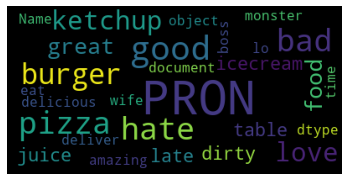

In [ ]:
#Import Library Word cloud
#Word cloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(x))

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

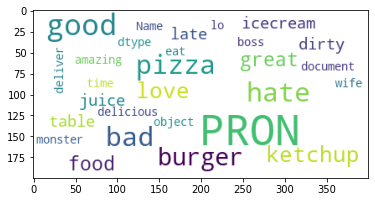

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(x))
plt.figure()
plt.imshow(wordcloud)
plt.axis("on")
plt.show()

# Student Activity (FGD 1 jam sampai paham)

# Student Activity
Lakukan proses di atas menggunakan dataset yang berbeda 